<a href="https://colab.research.google.com/github/vitroid/PythonTutorials/blob/master/Pending/8%E7%82%B9%E3%81%A7%E5%9B%9B%E8%A7%92%E5%BD%A2%E3%82%922%E3%81%A4%E4%BD%9C%E3%82%8B%E5%95%8F%E9%A1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2138 [[0.83636278 0.08224805]
 [0.99933476 0.77653417]
 [0.88158991 0.54345996]
 [0.58920288 0.69675369]
 [0.16562437 0.79582614]
 [0.8519411  0.15145596]
 [0.84397339 0.65274465]
 [0.88259214 0.28164848]]


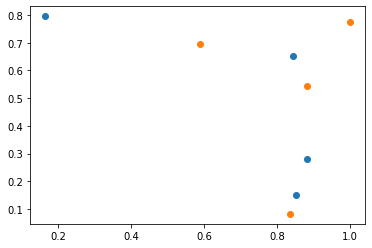

In [42]:
# https://jp.quora.com/平面上にどの３点も同一直線上にない８つの点があ
# るとき、それを４つと４つに分けてどちらも凸な四角形をなすようにできますか？

import numpy as np
import itertools as it
import matplotlib.pyplot as plt

def is_convex(points):
    # 最初の3点で三角形を作る。
    # 辺の順番で、右向きか左向きかを決めておく。
    assert points.shape[0] == 4
    o = points[0]
    oa, ob, oc = points[1:] - o
    if (oa[1]*ob[0] - oa[0]*ob[1]) < 0:
        oa, ob = ob, oa
    bo = -ob
    ab = ob - oa
    bc = oc - ob
    ac = oc - oa
    p1 = (oa[1]*oc[0] - oa[0]*oc[1]) > 0
    p2 = (bo[1]*bc[0] - bo[0]*bc[1]) > 0
    p3 = (ab[1]*ac[0] - ab[0]*ac[1]) > 0
    return sum((p1, p2, p3)) == 2


def proof(points):
    labels = set([i for i in range(8)])
    for i in it.combinations(labels, 4):
        j = list(labels - set(i))
        if is_convex(points[i,:]) and is_convex(points[j,:]):
            return True
    plt.scatter(points[i,0], points[i,1])
    plt.scatter(points[j,0], points[j,1])
    return False

for i in range(10000):
    points = np.random.random([8,2])
    if not proof(points):
        print(i, points)
        break

